In [1]:
import numpy as np
import pandas as pd
import random
from scipy.stats import shapiro

from diurnal_misinformation.path_utils import save_to_latex
from diurnal_misinformation.fourier_utils import FourierRoutine, plot_sinewaves, style_extrema_stats_df, style_dip_df, style_mwu_comparison_df
from diurnal_misinformation.config import ItalyConfig
from diurnal_misinformation.enums import Clusters

In [2]:
random_seed = 12
np.random.seed(random_seed)
random.seed(random_seed)
config = ItalyConfig()
routine = FourierRoutine(config, index_slice=Clusters.order())

# All users

## Activity, ratio and potentially disinformative activity, averaged over users in a cluster 

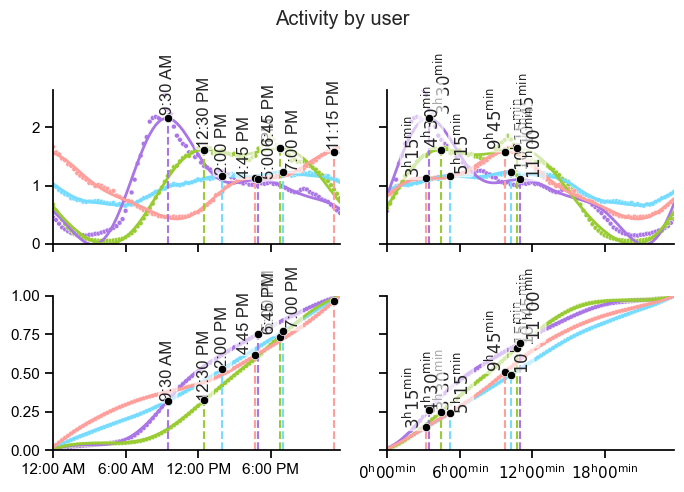

In [3]:
activity_result, ratio_result, disinf_activity_result = routine.by_user('all', save_plots=False);
activity_result.figure

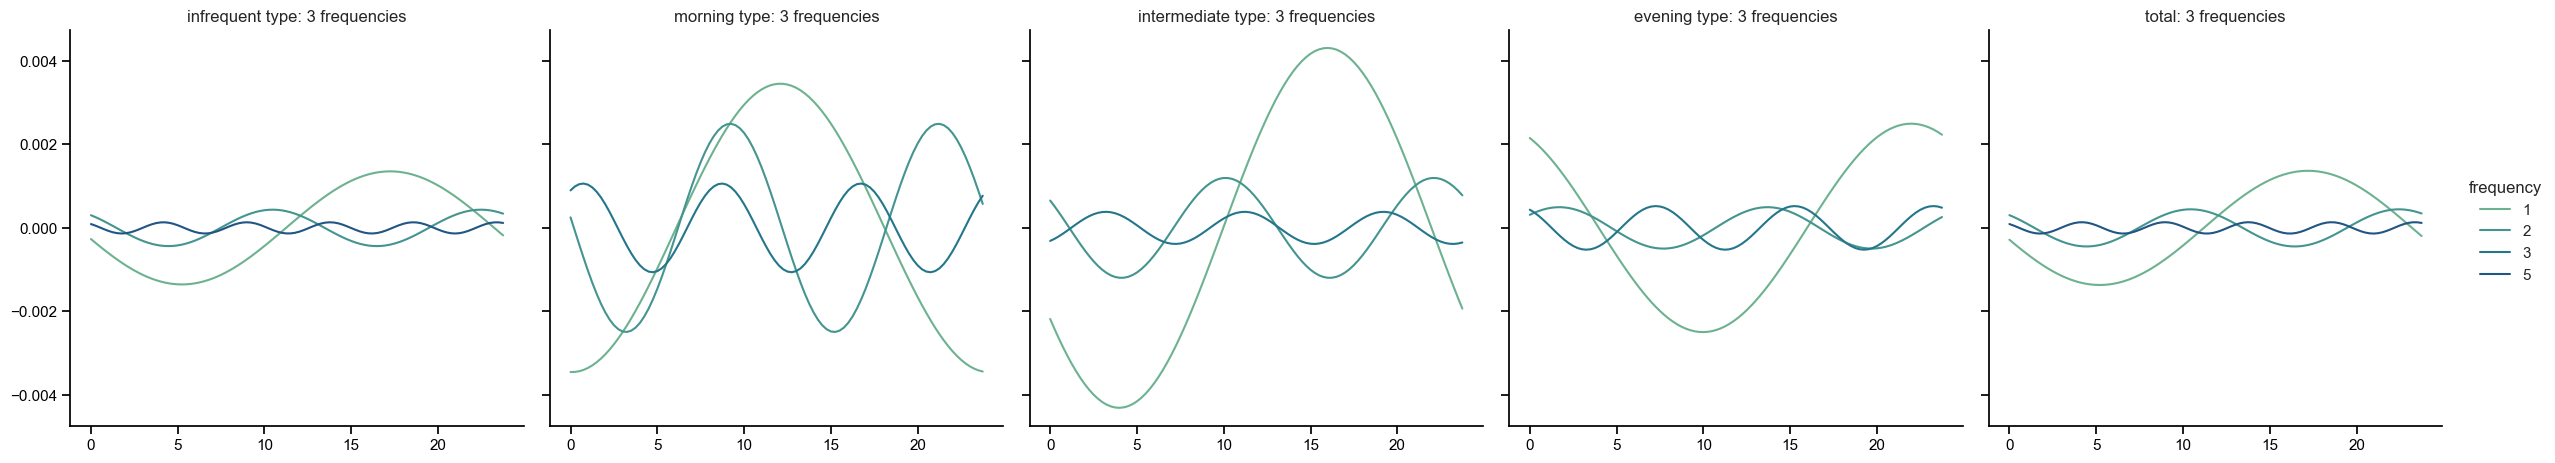

In [4]:
plot_sinewaves(activity_result.sinewaves, annotate_with=activity_result.frequencies);

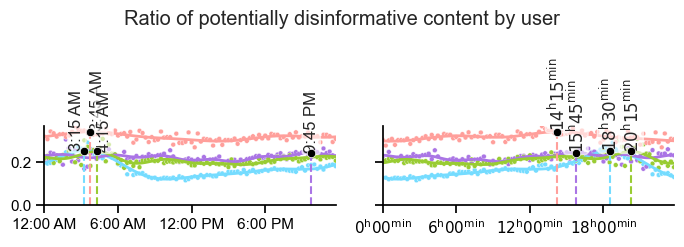

In [5]:
ratio_result.figure

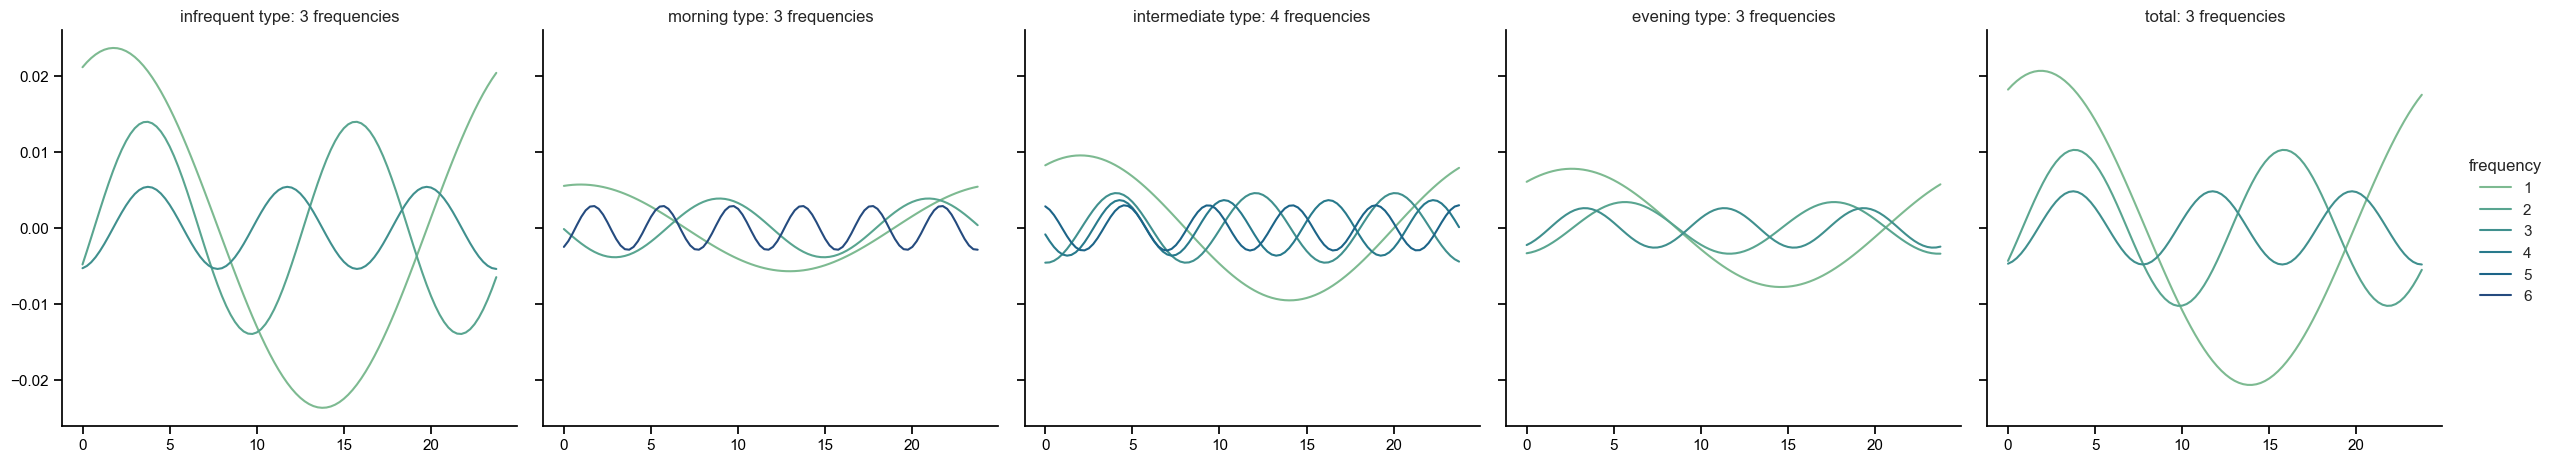

In [6]:
plot_sinewaves(ratio_result.sinewaves, annotate_with=ratio_result.frequencies);

In [7]:
ratio_result.signal.agg(('min', 'max'), axis=1)

,min,max
cluster,,
evening type,0.268195,0.365536
infrequent type,0.114927,0.290624
intermediate type,0.173034,0.307449
morning type,0.168463,0.304504
total,0.162679,0.294478


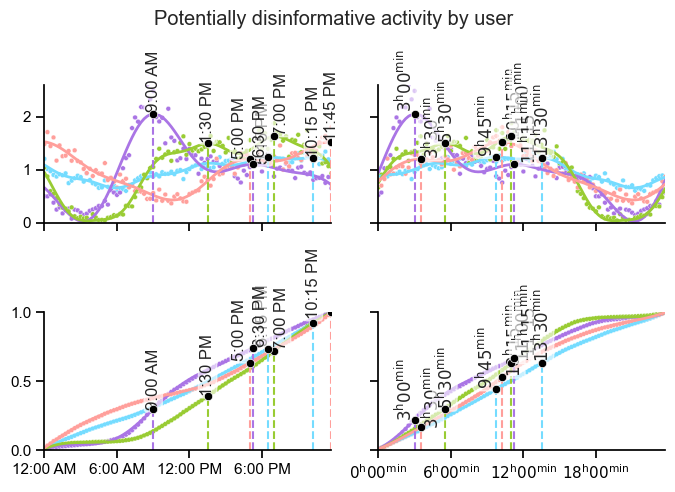

In [8]:
disinf_activity_result.figure

## Activity, Ratio and potentially disinformative activity averaged over tweets in a cluster 

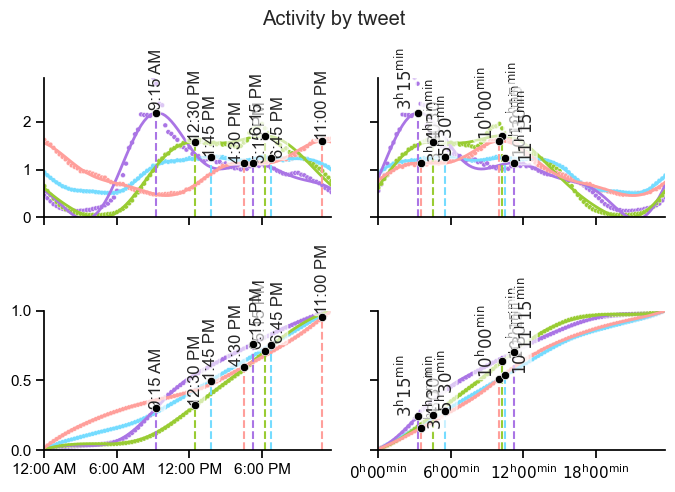

In [9]:
activity_result_by_tweet, ratio_result_by_tweet, disinf_activity_result_by_tweet = routine.by_tweet('all', save_plots=False);
activity_result_by_tweet.figure

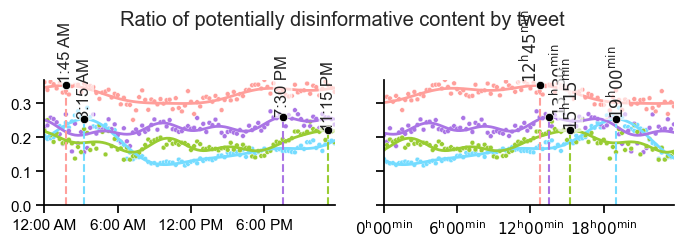

In [10]:
ratio_result_by_tweet.figure

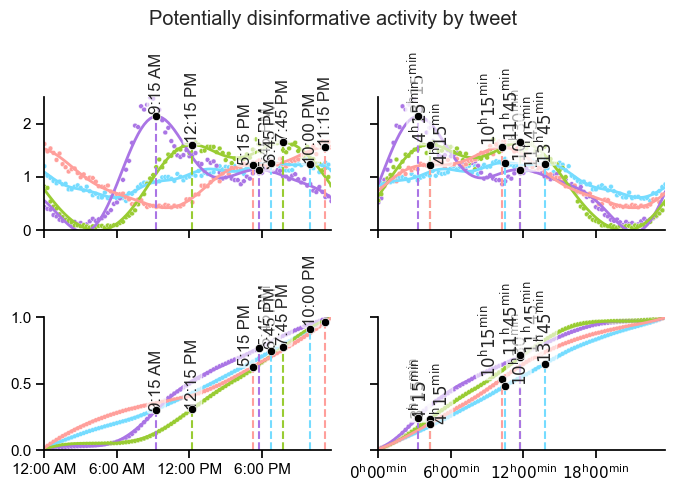

In [11]:
disinf_activity_result_by_tweet.figure

# Unverified

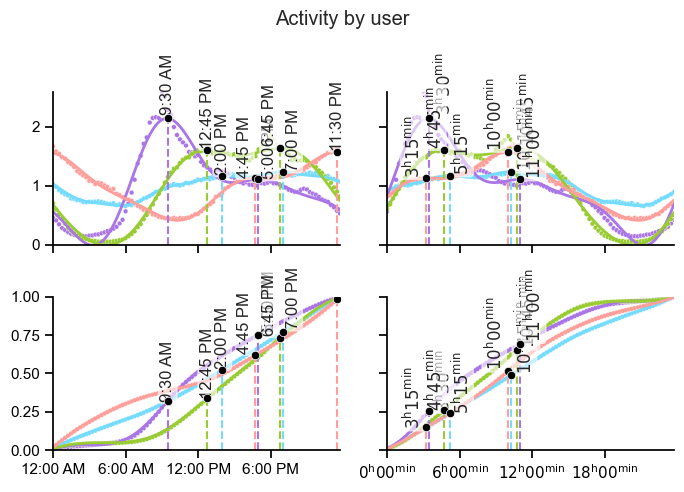

In [12]:
activity_result_unverified, ratio_result_unverified, disinf_activity_result_unverified = routine.by_user('unverified', save_plots=False);
activity_result_unverified.figure

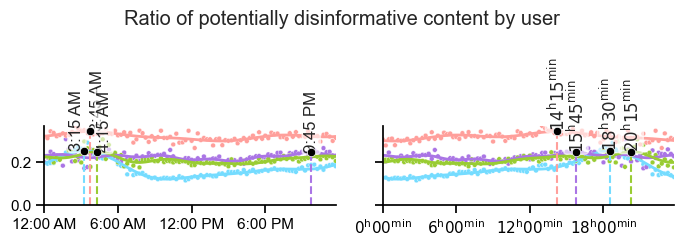

In [13]:
ratio_result_unverified.figure

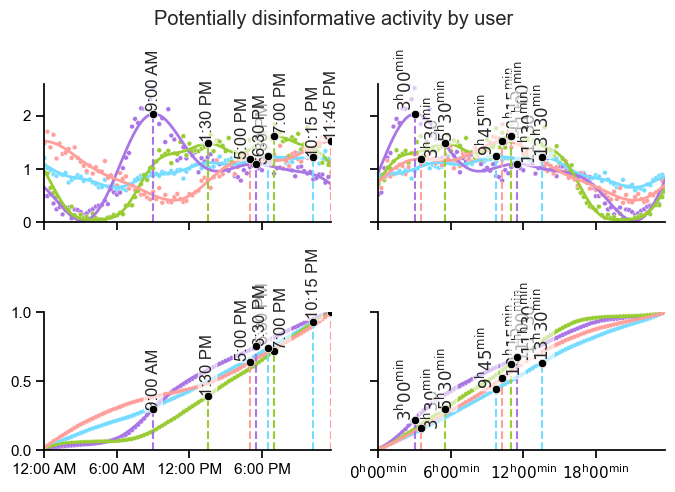

In [14]:
disinf_activity_result_unverified.figure

# Statistics

<p id="SupplTab3">Supplementary Table 2</p>

In [15]:
statsignals = {"activity": activity_result, "potentially disinformative content ratio": ratio_result, "potentially disinformative activity": disinf_activity_result}
activity_ratio_stats_style = style_extrema_stats_df(
    activity_result.increased_activity, 
    **statsignals,
    index_slice=pd.IndexSlice[statsignals.keys(), Clusters.order(), :]
)
save_to_latex(
    config, 
    activity_ratio_stats_style, 
    'activity_ratio_stats_all', 
    caption="Times of maximum and minimum of activity and of ratios of potentially disinformative content per cluster sorted by extremity.")

activity_ratio_stats_style

## Normal distribution

In [16]:
shapiro_df=pd.concat(
    [
        df.apply(shapiro, axis=1, result_type="expand") 
        for res in (activity_result, ratio_result)
        for df in (res.signal, res.recomposed_signal)
    ], 
    axis=1, keys=["activity (coarse)", "ratio (coarse)", "activity (smooth)", "ratio (smooth)"]
).rename(columns={0:'Statistic', 1: 'P-Value'})

In [17]:
shapiro_df_style = (shapiro_df
     .style
     .format('{:.3f}', subset=pd.IndexSlice[:, pd.IndexSlice[:, "Statistic"]])
     .format('{:.1e}', subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-Value"]])
     .map(lambda v: 'font-weight: bold;' if (v <0.05)  else None, subset=pd.IndexSlice[:, pd.IndexSlice[:, "P-Value"]]))
shapiro_df_style

The data is not normally distributed.

## Distribution size of ratios of potentially disinformative content across clusters

<p id="Table1">Table 1</p>

In [18]:
mannwhitneyu_df_style = style_mwu_comparison_df(order=Clusters.order(), coarse=ratio_result.signal, smooth=ratio_result.recomposed_signal)
mannwhitneyu_df_style

Evening types spread most potentially disinformative content,  infrequent types the least.

## Bimodality

<p id="SupplTab4">Supplementary Table 3:</p>

In [19]:
dip_df_style = style_dip_df(activity_result.increased_activity, order=Clusters.order(), coarse=activity_result.signal, smooth=activity_result.recomposed_signal)
save_to_latex(config, dip_df_style, 'dip_bimodality', caption="Dip-test for unimodality of user activity curves.")
dip_df_style